<a href="https://colab.research.google.com/github/shi-star/Ensemble_RF_ADAboost_GradientBoos_XGBoos/blob/main/email_prediction_boosting(Ada%2C_RF%2C_GradientBoosting%2C_XGBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<li>Most of the small to medium business owners are making effective use of 
Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in Business.</li><br>
<li>The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.</li><br>
<li>Data columns are self-explanatory.</li>

In [6]:
path = '/content/drive/MyDrive/data_email_campaign.csv'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**We imported the some basic libraries to perform the preprocessing and EDA on the data**

In [8]:
email = pd.read_csv(path)

**Imported the data now.**

In [9]:
email.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


**Got an overview of the data.**

In [10]:
email.shape

(68353, 12)

**Checked the shape of the data. We can see we have 68353 rows and 12 columns.**

In [11]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


**Got the info of the data,  At this point also we can see some columns have missing values in them, and we can see we have 10 numeric column and 2 categorical column.**

In [12]:
email.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

**We can see the counts of the missing values in every column.**

In [13]:
email.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


**<li>From describe , we can see there are many columns which are categorical but already in dummy format. For eg. Email_Type, has min value 1 and max value 2, which indicates it is a categorical column. Same like, Email_source_type, Email_compaign_type, 	Time_Email_sent_Category.</li>**<br>
We Can get an idea of the distribution of all the columns here . 


In [14]:
email.describe(include='object')

,Email_ID,Customer_Location
count,68353,56758
unique,68353,7
top,EMA00081389994040,G
freq,1,23173


**Here we can see Email_ID is a categorical Column. However it does not seem  useful. So we will drop it.**<br> 
**However we can see Customer Location here, it has 7 unique value and also the mode is G , we can see it has missing values as well. As Total count is less than total no. of rows here.** 

In [15]:
email.drop(columns=['Email_ID'], axis=1, inplace= True)

**Dropped the ID column here.**

In [18]:
email.columns.tolist()

['Email_Type',
 'Subject_Hotness_Score',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Total_Past_Communications',
 'Time_Email_sent_Category',
 'Word_Count',
 'Total_Links',
 'Total_Images',
 'Email_Status']

**Now have the rest of the columns.**

In [19]:
for i in email.columns:
  print(i)
  un= email[i].nunique()
  print(un)

Email_Type
2
Subject_Hotness_Score
51
Email_Source_Type
2
Customer_Location
7
Email_Campaign_Type
3
Total_Past_Communications
64
Time_Email_sent_Category
3
Word_Count
151
Total_Links
37
Total_Images
45
Email_Status
3


**Here we have checked the count of the unique values in each column so that we can select which all columns we can treat as categorical columns.**<br>
Here we can see there are some columns which have unique values as 37, 51 or more. So we will consider only the columns have 7 or less than 7 unique values. 

In [20]:
lis_cat = []
lis_num = []
for i in email.columns:
  if email[i].nunique() <= 7:
    lis_cat.append(i)
  else:
    lis_num.append(i)
print(lis_cat)
print(lis_num)

['Email_Type', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Time_Email_sent_Category', 'Email_Status']
['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images']


**We have created two list here. one for categorical columns. And one for numerical columns.**

In [21]:
from collections import Counter


In [22]:
for i in lis_cat:
  print(i)
  y = Counter(email[i])
  print(y)


Email_Type
Counter({1: 48866, 2: 19487})
Email_Source_Type
Counter({1: 37149, 2: 31204})
Customer_Location
Counter({'G': 23173, nan: 11595, 'E': 10193, 'D': 7406, 'C': 5758, 'F': 4433, 'B': 4341, 'A': 1454})
Email_Campaign_Type
Counter({2: 48273, 3: 19344, 1: 736})
Time_Email_sent_Category
Counter({2: 41129, 1: 13636, 3: 13588})
Email_Status
Counter({0: 54941, 1: 11039, 2: 2373})


**Just tried a new way to get the unique value counts in columns.**

In [23]:
for i in lis_cat:
  print(i)
  count= email[i].value_counts(normalize=True)
  print(count)
  print('\n')

Email_Type
1    0.714906
2    0.285094
Name: Email_Type, dtype: float64


Email_Source_Type
1    0.543487
2    0.456513
Name: Email_Source_Type, dtype: float64


Customer_Location
G    0.408277
E    0.179587
D    0.130484
C    0.101448
F    0.078104
B    0.076483
A    0.025618
Name: Customer_Location, dtype: float64


Email_Campaign_Type
2    0.706231
3    0.283001
1    0.010768
Name: Email_Campaign_Type, dtype: float64


Time_Email_sent_Category
2    0.601715
1    0.199494
3    0.198792
Name: Time_Email_sent_Category, dtype: float64


Email_Status
0    0.803783
1    0.161500
2    0.034717
Name: Email_Status, dtype: float64




We can see the % of the unique values in each column.<br>
**Here we can see our target column seems imbalanced. However we will use Boosting algo which can handle such imbalanced data. However there are other way of handling imbalanced data, however we will not do them in this model. We will do it for the same data but in notebook.**

# **Univariate Analysis**

In [24]:
lis_cat

['Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

**These are our categorical Columns. Let's do the univariate analysis of these columns first.**

In [25]:
import warnings
warnings.filterwarnings("ignore")

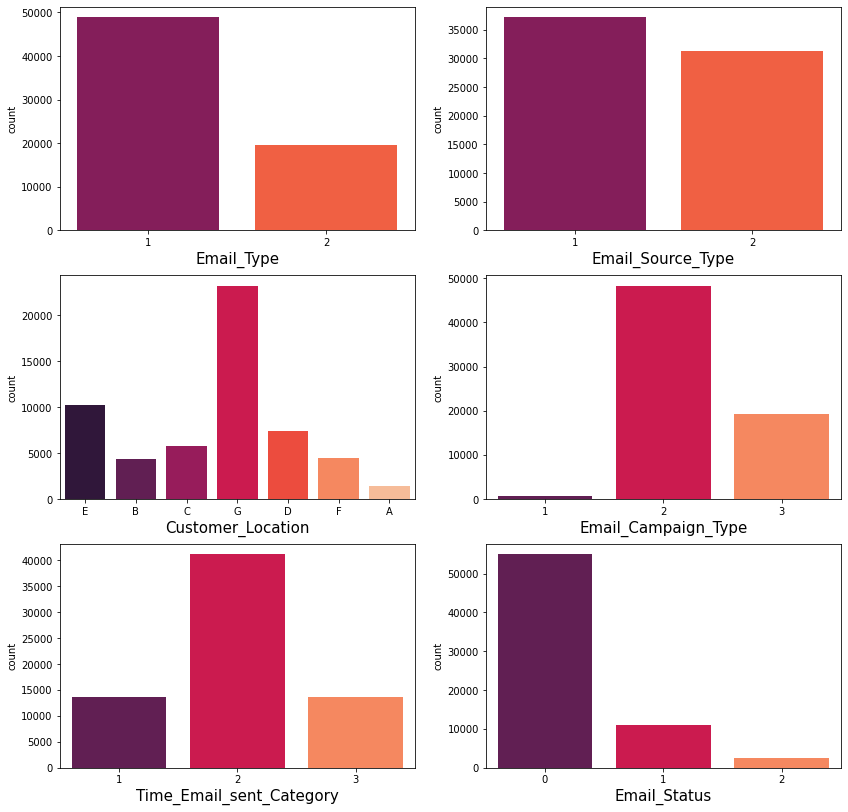

In [26]:
fig = plt.figure(figsize=(14,14))
a = 3
b = 2
c = 1
for i in lis_cat:
 
  plt.subplot(a, b, c)
  plt.xlabel(i, fontsize=15)
  sns.countplot(email[i], palette='rocket', saturation = 1)
  c = c + 1

plt.show()

1.Here we can see 70% of the emails are of 1 type.<br>
2.We can see the 60% of the email_source_type are of 1 type.<br>
3.We can see mostly people are from location 'G'.<br>
4.Mostly are of 2, and 3 email_compaign_type.<br>
5.Maximum Email_sent_cat is in 2nd category.<br>



**Let's do the univariate analysis of the numerical column**

In [27]:
lis_num

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Word_Count',
 'Total_Links',
 'Total_Images']

**These are the numerical columns.**

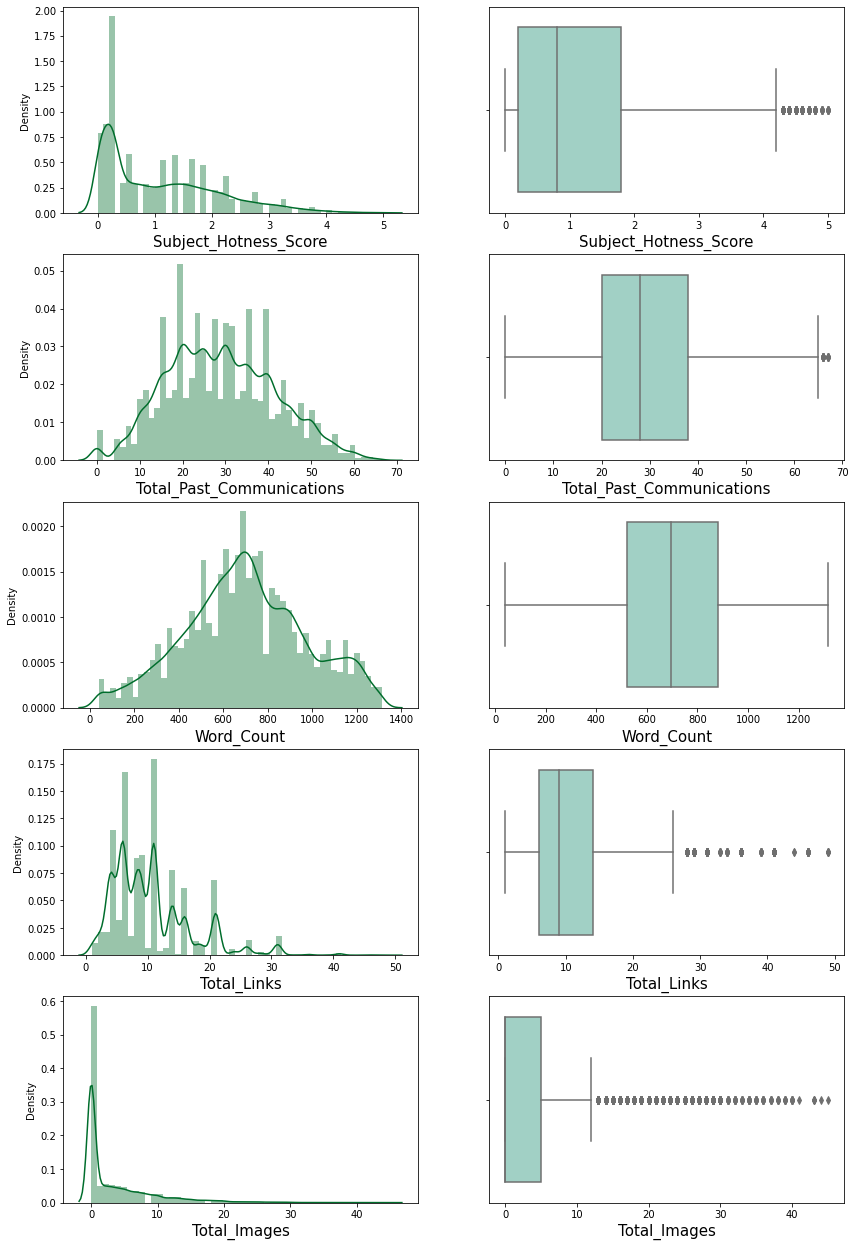

In [28]:
a = 5
b = 2
c = 1
fig = plt.figure(figsize=(14,22))
for i in lis_num:
  plt.subplot(a, b, c)
  plt.xlabel(i, fontsize=15)
  sns.distplot(email[i], color='#006d2c')
  c = c + 1


  plt.subplot(a, b, c)
  plt.xlabel(i, fontsize=15)
  sns.boxplot(x = email[i], color='#99d8c9')
  c = c + 1
plt.show()

1. We can see Total_past_comm. is normally distributed. The max. values lie between 20 to 40. <br>
2. We can see Word_coount is normally distributed. the max. values lie between 500 to 900.<br>
3. We can Total_links is right skewed. We can see many points as outliers. However as we are 
going to use boosting here , so the algo are able to handle outliers. <br>
4. We can see mostly emails contain 0-5 images in the emails. However the column is positively skewed. <br>








# **Bivariate Analysis**

**Bivariate analysis of categorical columns with the target variable.**

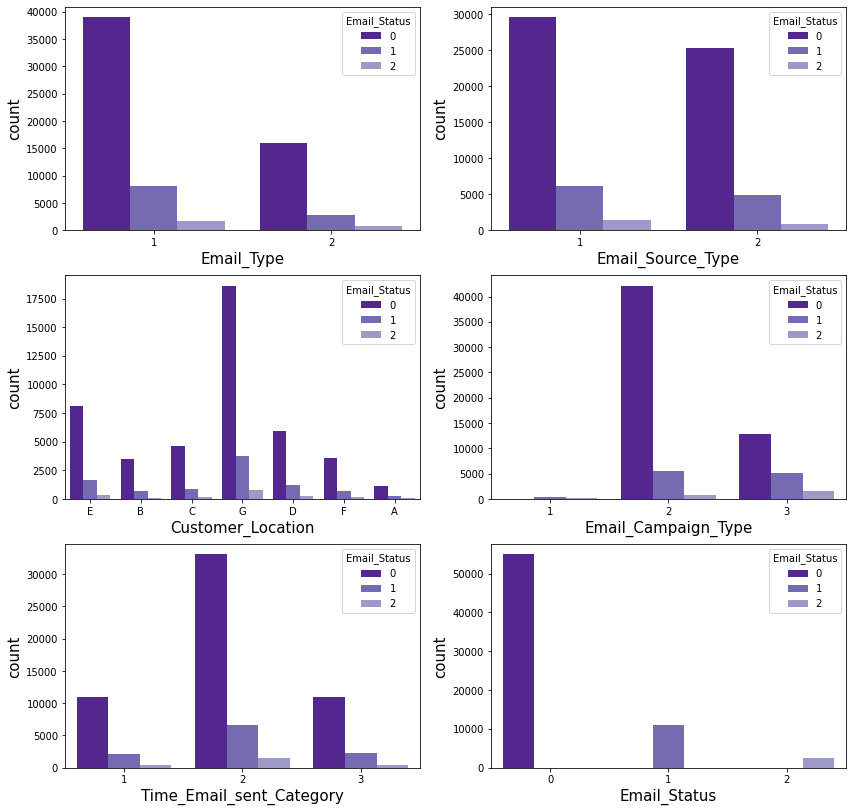

In [30]:
fig = plt.figure(figsize=(14,14))
a = 3
b = 2
c = 1
for i in lis_cat:
  color= ['#54278f', '#756bb1','#9e9ac8']
  plt.subplot(a, b, c)
  plt.xlabel(i, fontsize=15)
  plt.ylabel('Email_Status', fontsize=15)
  sns.countplot(x=email[i], palette=color , saturation = 1, hue=email['Email_Status'],)
  c = c + 1

plt.show()

**Let's do the bivariate analysis of numerical columns with the target variable.**

In [31]:
list_num = ['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Word_Count',
 'Total_Links',
 'Total_Images','Email_Status']

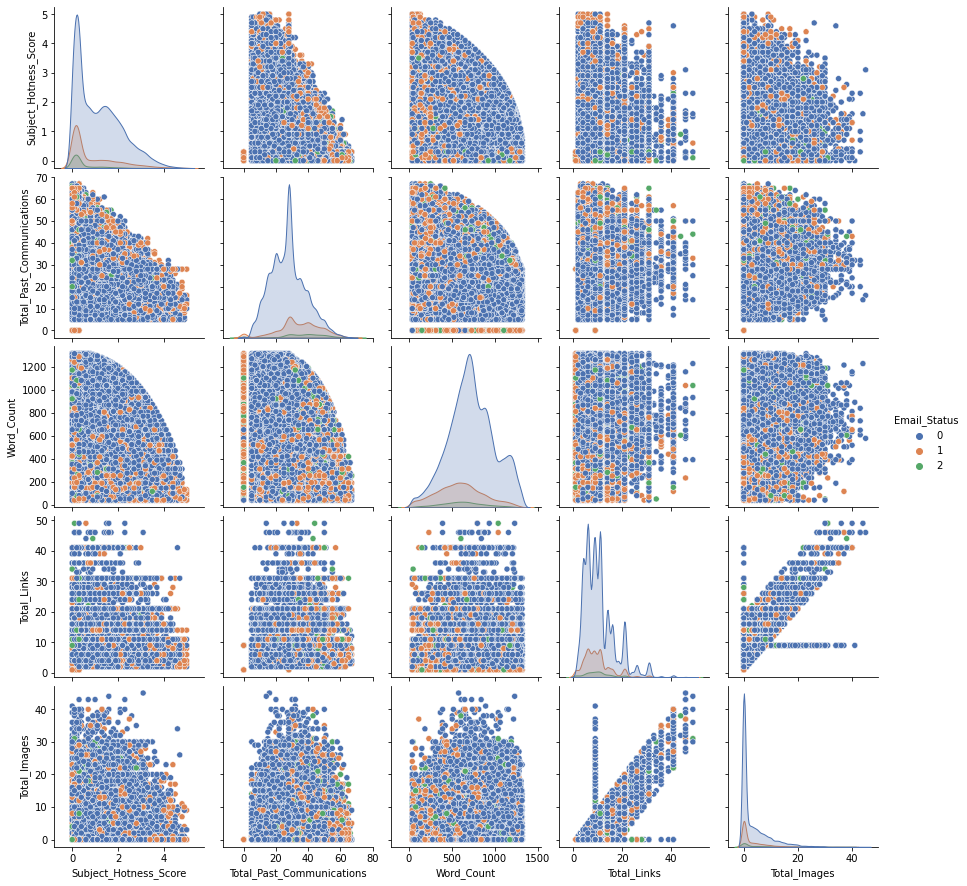

In [160]:
sns.pairplot(email[list_num], hue = 'Email_Status', palette='deep')

**We can see the relation among the numerical columns.** 

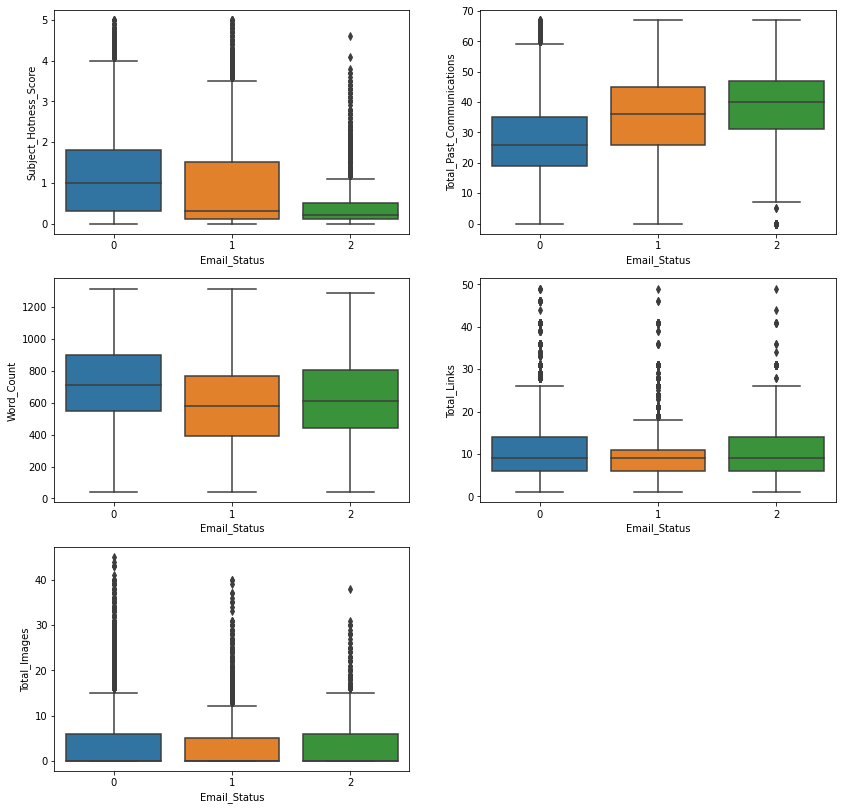

In [33]:
fig = plt.figure(figsize=(14,14))
a = 3
b = 2
c = 1
for i in lis_num:
  plt.subplot(a, b, c)
  sns.boxplot(data = email, y = i, x = 'Email_Status')
  c = c + 1

plt.show()

**Let's treat the missing values.**

In [34]:
email.isnull().sum()/len(email)

Email_Type                   0.000000
Subject_Hotness_Score        0.000000
Email_Source_Type            0.000000
Customer_Location            0.169634
Email_Campaign_Type          0.000000
Total_Past_Communications    0.099849
Time_Email_sent_Category     0.000000
Word_Count                   0.000000
Total_Links                  0.032200
Total_Images                 0.024534
Email_Status                 0.000000
dtype: float64

**As we did not find any relation among the columns so created one new category for missing values as 'NONe' in customer location column.**

In [35]:
email['Customer_Location'].value_counts(dropna=False)

G      23173
NaN    11595
E      10193
D       7406
C       5758
F       4433
B       4341
A       1454
Name: Customer_Location, dtype: int64

In [36]:
email['Total_Past_Communications'].median()

28.0

In [37]:
email['Total_Past_Communications'].mean()

28.93324990248342

In [38]:
print(email['Total_Links'].mean())
print(email['Total_Links'].median())
print(email['Total_Images'].mean())
print(email['Total_Images'].median())


10.429525940258799
9.0
3.550677905093287
0.0


In [39]:
email['Customer_Location'].fillna('None', inplace= True)

In [40]:
email['Customer_Location'].isnull().sum()

0

In [41]:
email['Total_Links'].fillna(email['Total_Links'].median(), inplace=True)

In [42]:
email['Total_Images'].fillna(email['Total_Images'].median(), inplace=True)

In [43]:
email['Total_Past_Communications'].fillna(email['Total_Past_Communications'].median(), inplace=True)

In [44]:
email.isnull().sum()

Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

**Replaced the missing values with the median of that column. As the values are few in rest of the columns.**

In [45]:
email1 = pd.get_dummies(email, drop_first=True)

**Let's change the categories into dummy variable.**

In [46]:
email1.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Customer_Location_None
0,1,2.2,2,2,33.0,1,440,8.0,0.0,0,0,0,0,1,0,0,0
1,2,2.1,1,2,15.0,2,504,5.0,0.0,0,0,0,0,0,0,0,1
2,2,0.1,1,3,36.0,2,962,5.0,0.0,1,1,0,0,0,0,0,0
3,1,3.0,2,2,25.0,2,610,16.0,0.0,0,0,0,0,1,0,0,0
4,1,0.0,2,3,18.0,2,947,4.0,0.0,0,0,1,0,0,0,0,0


**Now our data is ready to split.**

In [161]:
email1.shape

(68353, 17)

**Now we have 17 columns. As before we had 12 columns.**

In [49]:
X= email1.drop('Email_Status', axis= 1)

**Split the data into X and y. **

In [50]:
email1['Email_Status']=email1['Email_Status'].replace(2,1)

**Here we have 3 classes for target variable so for our convenience, we have replaced class 2 into class 1. As we are doing binary classification right now.**

In [51]:
y = email1['Email_Status']

In [52]:
y.unique()

array([0, 1])

**Let's build the models.**
Here I am going to build four models.<br>
**1. Random Forest.**<br>
<li>Random Forest with default parameters.</li>
<li>Random Forest with Grid Search best parameters.</li><br>

**2. Ada Boosting**<br>
<li> Ada Boosting with default parameters.</li>
<li>Ada Boosting with Grid Search best parameters.</li><br>

**3. Gradient Boosting**
<li>Gradient Boosting with default parameters.</li>
<li>Gradient Boosting with Grid Search best parameters.</li><br>

**4. XG Boosting**
<li>XG Boosting with default parameters.</li>
<li>XG Boosting with Grid Search best parameters.</li>

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix


**Import the models and metrics required.**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size= 0.3, random_state=0)

**Let's split the data into X_train, X_test, y_train, y_test**

In [55]:
X_train.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Customer_Location_None
38012,1,1.2,2,2,28.0,2,1189,8.0,0.0,0,0,0,0,0,0,1
23900,1,0.9,1,2,20.0,2,1241,31.0,16.0,0,0,0,0,0,1,0
64910,1,1.2,2,2,22.0,2,855,6.0,0.0,0,0,0,0,0,1,0
26995,1,2.8,2,2,17.0,2,678,4.0,0.0,0,0,1,0,0,0,0
11623,2,0.1,1,3,28.0,2,694,14.0,0.0,0,1,0,0,0,0,0


In [56]:
X_train.shape

(47847, 16)

# **Random Forest**

## **Random Forest with Default Parameters.**

In [57]:
rf = RandomForestClassifier(class_weight='balanced')

In [58]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
y_pred = rf.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89     16503
           1       0.58      0.24      0.34      4003

    accuracy                           0.82     20506
   macro avg       0.71      0.60      0.62     20506
weighted avg       0.79      0.82      0.79     20506



In [61]:
print(confusion_matrix(y_test, y_pred))

[[15831   672]
 [ 3056   947]]


## **Random Forest with Grid Search CV parameters.**

In [62]:
param_grid = {'n_estimators':[300,500],
              'criterion':['gini'],
              'max_depth': [5,7],
              'min_samples_split':[2,3],
              'min_samples_leaf':[30],
              'max_features':[5,10],
              }
              

In [63]:
gscv_rf = GridSearchCV(rf,param_grid=param_grid, cv=5, n_jobs=1, scoring='roc_auc', verbose=3)

In [65]:
gscv_rf.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] criterion=gini, max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=300 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=300, score=0.777, total=   5.7s
[CV] criterion=gini, max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=300 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=300, score=0.793, total=   5.7s
[CV] criterion=gini, max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=300 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=300, score=0.772, total=   5.7s
[CV] criterion=gini, max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=300 
[CV]  criterion=gini, max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=300, score=0.776, total=   5.6s
[CV] criterion=gini, max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=300 
[CV]  criterion=gini, max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=300, score=0.783, total=   5.7s
[CV] criterion=gini, max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=500, score=0.776, total=   9.6s
[CV] criterion=gini, max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=500 
[CV]  cr

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 14.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [67]:
print(gscv_rf.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 30, 'min_samples_split': 2, 'n_estimators': 300}


In [69]:
print(gscv_rf.best_score_)
print(gscv_rf.best_estimator_)
print(gscv_rf.scorer_)


0.7894018136825179
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
make_scorer(roc_auc_score, needs_threshold=True)


In [70]:
rf_gs = RandomForestClassifier(criterion='gini', max_depth= 7, max_features= 10, min_samples_leaf= 30, min_samples_split= 2, n_estimators= 300)

In [71]:
rf_gs.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
rf_gs.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [159]:
print(roc_auc_score(y_true=y_test,y_score=rf_gs.predict_proba(X_test)[:, 1]))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.7854661252137005
[[15831   672]
 [ 3056   947]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     16503
           1       0.58      0.24      0.34      4003

    accuracy                           0.82     20506
   macro avg       0.71      0.60      0.62     20506
weighted avg       0.79      0.82      0.79     20506



**==============================================================================================================**

# **Adaboost Classifier**

## **Adaboost Classification with default parameters.**

In [162]:
from sklearn.ensemble import AdaBoostClassifier

In [163]:
ada = AdaBoostClassifier()

In [164]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [165]:
y_pred1=ada.predict(X_test)

In [166]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     16503
           1       0.61      0.23      0.34      4003

    accuracy                           0.82     20506
   macro avg       0.72      0.60      0.62     20506
weighted avg       0.79      0.82      0.79     20506



## **Adaboost Classification with best parameters by Grid Search CV.**

In [104]:
param_grid = {'n_estimators':[100,300],
              'learning_rate':[0.01,0.025, 0.05,0.1]}
gscv_ada= GridSearchCV(ada, param_grid=param_grid, scoring='roc_auc', verbose=3, n_jobs=-1,cv=3)

In [ ]:
gscv_ada.fit(X_train, y_train)

In [167]:
print(gscv_ada.best_params_)
print(gscv_ada.best_score_)
print(gscv_ada.best_estimator_)

{'learning_rate': 0.1, 'n_estimators': 300}
0.7819140343047142
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=300, random_state=None)


In [168]:
y_pred_gs_ad= gscv_ada.predict(X_test)

In [157]:
print(roc_auc_score(y_true=y_test,y_score=gscv_ada.predict_proba(X_test)[:, 1]))
print(confusion_matrix(y_test,y_pred_gs_ad))
print(classification_report(y_test,y_pred_gs_ad))

0.7790330447946625
[[16024   479]
 [ 3260   743]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     16503
           1       0.61      0.19      0.28      4003

    accuracy                           0.82     20506
   macro avg       0.72      0.58      0.59     20506
weighted avg       0.79      0.82      0.78     20506



**==============================================================================================================**

# **Gradient Boosting**

## **Gradient Boosting with default parameters.**

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
grd= GradientBoostingClassifier()

In [115]:
grd.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [117]:
y_pred_grd= grd.predict(X_test)

In [118]:
print(classification_report(y_test,y_pred_grd))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     16503
           1       0.62      0.25      0.35      4003

    accuracy                           0.82     20506
   macro avg       0.73      0.61      0.63     20506
weighted avg       0.80      0.82      0.79     20506



## **Gradient Boosting with best parameters by Grid Search CV.**

In [123]:
param_grid = {'n_estimators':[100,300],
              'learning_rate':[0.01,0.025, 0.05,0.1],
              'max_depth': [3,5],
              
              'min_samples_leaf':[50]}

gscv_grd= GridSearchCV(grd, param_grid=param_grid, scoring='roc_auc', verbose=3, n_jobs=-1,cv=3)              


In [124]:
gscv_grd.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  5.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...,
                

In [125]:
print(gscv_grd.best_params_)
print(gscv_grd.best_score_)
print(gscv_grd.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 50, 'n_estimators': 300}
0.7948549202411846
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [127]:
y_pred_gscv_grd = gscv_grd.predict(X_test)

In [156]:
print(roc_auc_score(y_true=y_test,y_score=gscv_grd.predict_proba(X_test)[:, 1]))
print(confusion_matrix(y_test, y_pred_gscv_grd))
print(classification_report(y_test,y_pred_gscv_grd))

0.7926767537205365
[[15854   649]
 [ 2946  1057]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     16503
           1       0.62      0.26      0.37      4003

    accuracy                           0.82     20506
   macro avg       0.73      0.61      0.63     20506
weighted avg       0.80      0.82      0.80     20506



**======================================================================================================**

# **XG Boosting**

## **XG Boosting with default parameters**

In [133]:
from xgboost import XGBClassifier

In [135]:
xg = XGBClassifier()

In [136]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [138]:
y_pred_xg = xg.predict(X_test)

In [139]:
print(roc_auc_score(y_true=y_test,y_score=xg.predict_proba(X_test)[:, 1]))
print(confusion_matrix(y_test, y_pred_xg))
print(classification_report(y_test,y_pred_xg))


0.7888853099011105
[[15913   590]
 [ 3033   970]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     16503
           1       0.62      0.24      0.35      4003

    accuracy                           0.82     20506
   macro avg       0.73      0.60      0.62     20506
weighted avg       0.80      0.82      0.79     20506



## **XG Boosting with best parameters by Grid Search CV.**

In [140]:
model_parameters = { 'n_estimators': [200, 300],
                    'learning_rate': [0.01, 0.05, 0.1],
                    'max_depth': [2, 3],
                    'min_child_weight': [ 20, 30]
                    }

In [141]:
gscv_xg = GridSearchCV(xg, param_grid=model_parameters, 
                    cv=3,  
                    verbose=3, 
                    n_jobs=-1, 
                    scoring='roc_auc')

In [142]:
gscv_xg.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3], 'min_child_weight': [20, 30],
                         'n_estimators': [

In [143]:
print(gscv_xg.best_params_)
print(gscv_xg.best_score_)
print(gscv_xg.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 20, 'n_estimators': 300}
0.795619942007043
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=20, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [144]:
y_pred_gscv_xg = gscv_xg.predict(X_test)

In [145]:
print(roc_auc_score(y_true=y_test,y_score=gscv_xg.predict_proba(X_test)[:, 1]))
print(confusion_matrix(y_test, y_pred_gscv_xg))
print(classification_report(y_test,y_pred_gscv_xg))

0.7928308373942836
[[15891   612]
 [ 2974  1029]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     16503
           1       0.63      0.26      0.36      4003

    accuracy                           0.83     20506
   macro avg       0.73      0.61      0.63     20506
weighted avg       0.80      0.83      0.79     20506



**====================================================================================================**

## **Let's compare the roc_curve of all the models.**

In [147]:
def plot_roc_curve( y_pred1, y_pred_gs_ad, y_pred_gscv_grd, y_pred_gscv_xg , *args):
    '''
    Generate test roc curve
    '''

    AUC_rf = roc_auc_score(y_test, y_pred1)
    AUC_ad = roc_auc_score(y_test, y_pred_gs_ad)
    AUC_grd = roc_auc_score(y_test, y_pred_gscv_grd)
    AUC_xg = roc_auc_score(y_test, y_pred_gscv_xg)
    if len(args) == 0:
        print("RF_AUC =" ,AUC_rf )
        print("ADA_AUC = ", AUC_ad)
        print("GB_AUC=" , AUC_grd )
        print("XG_AUC=", AUC_xg )
        fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred1)
        fpr_ad, tpr_ad, thresholds = roc_curve(y_test, y_pred_gs_ad)
        fpr_grd, tpr_grd, thresholds = roc_curve(y_test, y_pred_gscv_grd)
        fpr_xg, tpr_xg, thresholds = roc_curve(y_test, y_pred_gscv_xg)
        roc_plot(fpr_rf, tpr_rf, fpr_ad, tpr_ad, fpr_grd, tpr_grd, fpr_xg, tpr_xg)

    else:
        AUC_Valid = roc_auc_score(args[0], args[1])
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        print("Validation AUC = ", AUC_Valid)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(y_test_actual, test_pred_prob)
        fpr_val, tpr_val, thresholds = roc_curve(args[0], args[1])
        roc_plot(fpr, tpr, fpr_tst, tpr_tst, fpr_val, tpr_val)

In [149]:
def roc_plot(fpr_rf, tpr_rf, fpr_ad, tpr_ad, fpr_grd, tpr_grd, fpr_xg, tpr_xg, *args):
    '''
    Generates roc plot
    '''

    fig = plt.plot(fpr_rf, tpr_rf, label='ROC_RF')
    fig = plt.plot(fpr_ad, tpr_ad, label='ROC_AD')
    fig = plt.plot(fpr_grd, tpr_grd, label= 'ROC_GRD')
    fig = plt.plot(fpr_xg, tpr_xg, label = 'ROC_XG')

    if len(args) == 0:
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

    else:
        fig = plt.plot(args[0], args[1], label='Validation')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

RF_AUC = 0.7868070800502
ADA_AUC =  0.7790330447946625
GB_AUC= 0.7926767537205365
XG_AUC= 0.7928308373942836


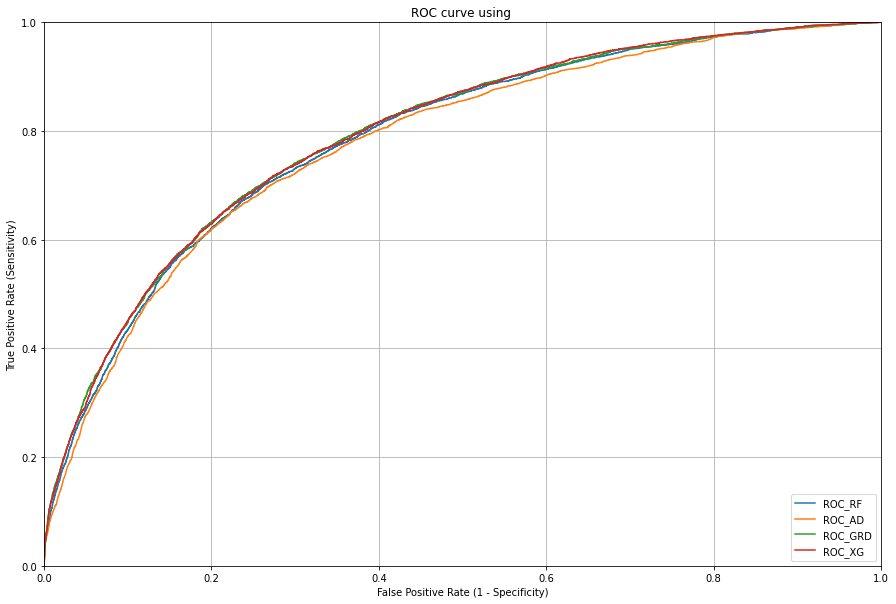

In [154]:
plt.subplots(figsize=(15, 10))
RF = gscv_rf.predict_proba(X_test)[:, 1]
Ada = gscv_ada.predict_proba(X_test)[:, 1]
GRD = gscv_grd.predict_proba(X_test)[:, 1]
XG = gscv_xg.predict_proba(X_test)[:, 1]


plot_roc_curve(RF, Ada,
               GRD, XG)

**We can see there is not much difference in the roc_score of all the models. However we get the best roc_score in XG boosting.**